In [1]:
import ogstools as ot
import numpy as np
import matplotlib.pyplot as plt
import vtuIO

In [2]:
#m = ot.Project(input_file="fault_slip_SD_MC_reference.prj", output_file="fault_slip_SD_MC_reference.prj")

In [3]:
#m.write_input()

In [4]:
#m.run_model(path="~/github/ogs-build/FaultSlipModels/bin/", logfile="out_one_anchor.log", background=True)

In [5]:
#m.plot_log(log_data = ["step_start_time","iteration_number"])    

In [6]:
pts = {"ptl1": (11.0, 15.0, 0.0), "ptr1": (13.0, 15.0, 0.0),
       "ptl2": (9.0, 10.0, 0.0), "ptr2": (11.0, 10.0, 0.0),
       "ptl3": (5.0, 4.0, 0.0), "ptr3": (9.0, 4.0, 0.0)}

In [7]:
files = ["fault_slip_nonIter_WP_ref.pvd", "fault_slip_nonIter_WP_anchors.pvd", "fault_slip_nonIter_WP_anchors_prestress.pvd", "fault_slip_nailanchors_prestress.pvd"]#["fault_slip_ref.pvd", "fault_slip_anchors.pvd", "fault_slip_anchors_prestress.pvd"]
f = {}
for file in files:
    f[file.replace("fault_slip_","").replace(".pvd","")] = vtuIO.PVDIO(file, dim=2)

In [8]:
m = ot.Mesh("fault_slip_nonIter_WP_ref_ts_94_t_45.000000.vtu")

# Slope stabilized by anchors
The problem consists of a rectangular model domain divided by a weakness plan.
While the right part is fixed at the bottom and the right side, the left part is only controled by Neumann traction forces.
A force pushing at the top on both sides causes a slipping of the slope.
This slip can be prevented by fixing the left part using one-dimesional anchor elements to the fixed side.

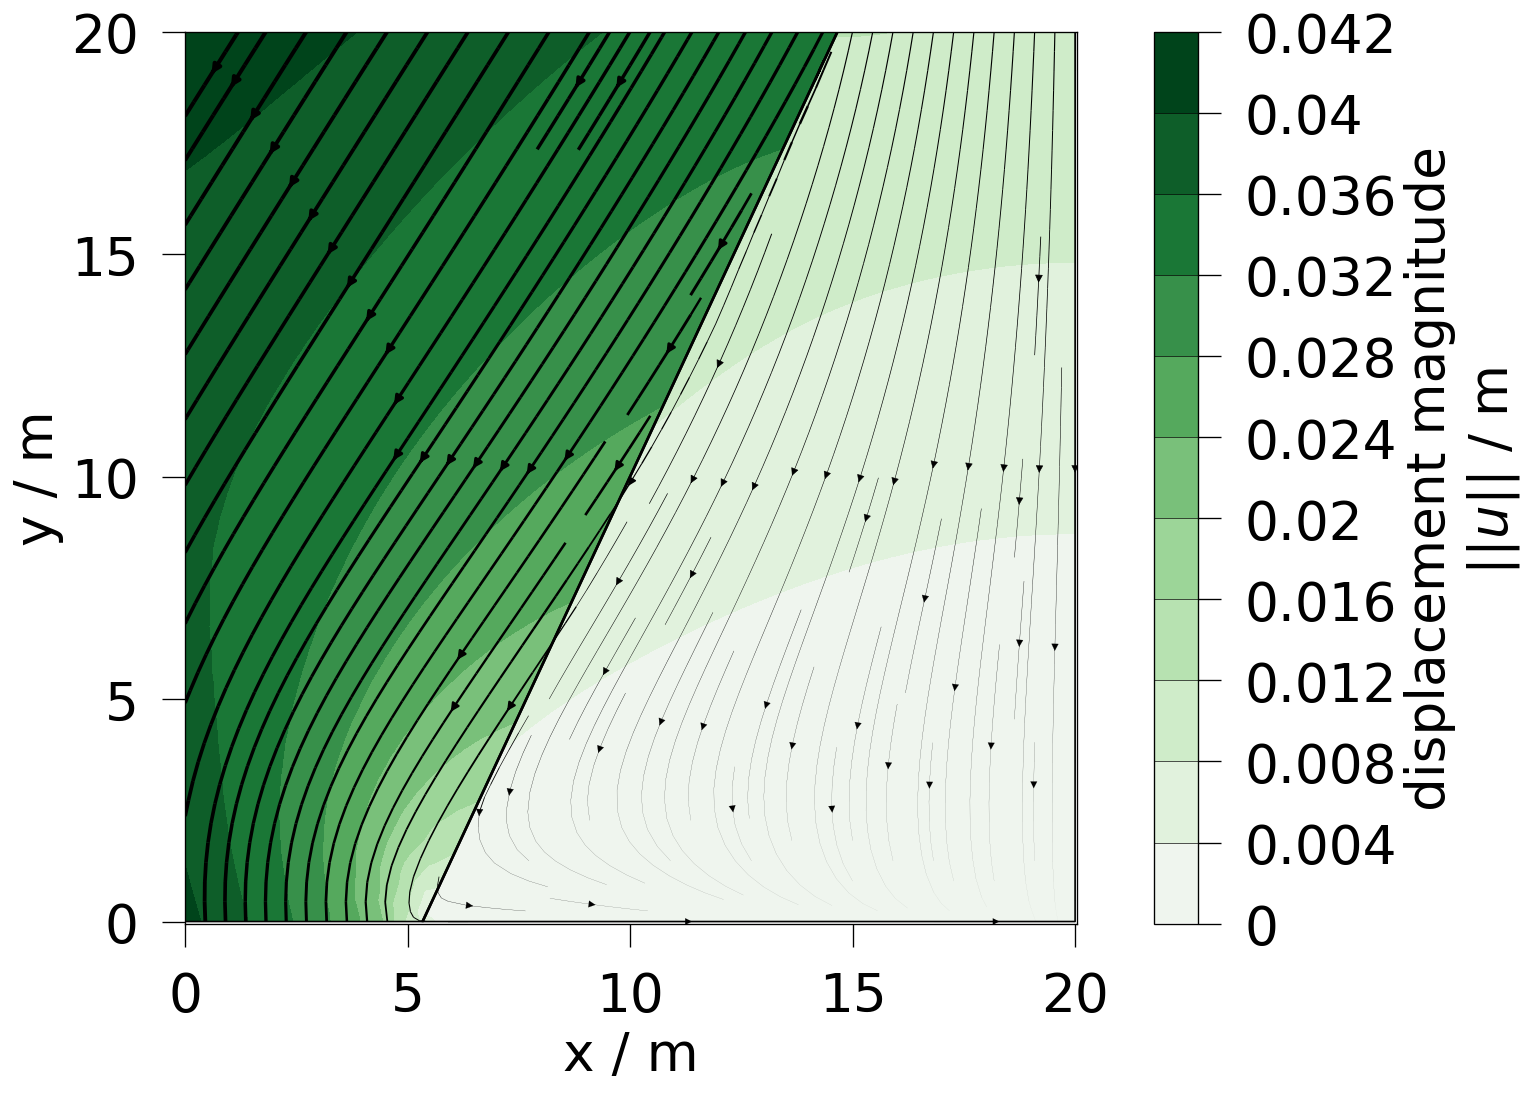

In [9]:
fig = m.plot_contourf(ot.variables.displacement)

Anchor elements can be defined in JSON files by giving the start and end points and setting their properties:

```json
{
    "anchor_start_points": [
        [
            1,
            18,
            0
        ],
        [
            1,
            14,
            0
        ],
        [
            1,
            9,
            0
        ],
        [
            1,
            4.5,
            0
        ]

    ],
    "anchor_end_points": [
        [
            16.4,
            18.0,
            0
        ],
        [
            14.4,
            14.0,
            0
        ],
        [
            12.4,
            9.0,
            0
        ],
        [
            10.4,
            4.5,
            0
        ]


    ],
    "maximum_anchor_stress": [500e26, 500e26, 500e26, 500e26],
    "initial_anchor_stress": [5e7, 5e7, 5e7, 5e7],
    "residual_anchor_stress": [250e6, 250e6, 250e6, 250e6],
    "anchor_radius": [0.2, 0.2, 0.2, 0.2],
    "anchor_stiffness": [100e9, 100e9, 100e9, 100e9]
}
```

This JSON file can be converted into an Anchor VTU file which can be read in as every other boundary or source term mesh file:

```bash
CreateAnchors -f four_anchors.json -i geo_domain_2D_q8.vtu -o four_anchors_prestress.vtu -l all --max-iter 60 --tolerance 1e-13
```

The actual Anchors are the activated by the corresponding source term type:
```xml
<source_terms>
    <source_term>
        <mesh>four_anchors_prestress</mesh>
        <type>EmbeddedAnchor</type>
        <external_anchor_head_load>force0</external_anchor_head_load>
    </source_term>
</source_terms>
```

In [10]:
data = {}
for entry in f:
    data[entry] = f[entry].read_time_series("displacement", pts=pts)

In [12]:
colors = ['b', 'r', 'g', 'y', 'k']

The following plots show the difference in the displacement of the left and the right side without anchors, with relaxed and prestressed anchors.

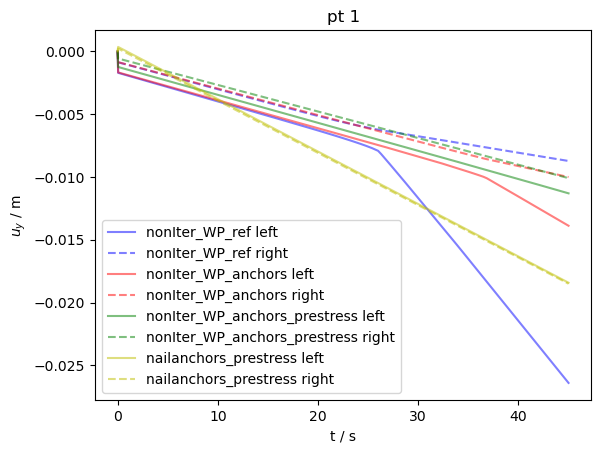

In [13]:
for i, entry in enumerate(data):
    plt.plot(f[entry].timesteps, data[entry]["ptl1"][:,1], f"{colors[i]}-", label=f"{entry} left", alpha=0.5)
    plt.plot(f[entry].timesteps, data[entry]["ptr1"][:,1], f"{colors[i]}--", label=f"{entry} right", alpha=0.5)
plt.ylabel("$u_y$ / m")
plt.xlabel("t / s")
plt.title("pt 1")
plt.legend()
plt.savefig("MC_vs_WP_models.png")

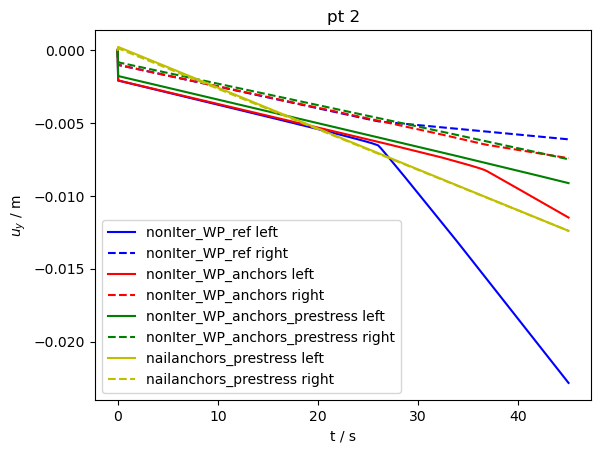

In [14]:
for i, entry in enumerate(data):
    plt.plot(f[entry].timesteps, data[entry]["ptl2"][:,1], f"{colors[i]}-", label=f"{entry} left")
    plt.plot(f[entry].timesteps, data[entry]["ptr2"][:,1], f"{colors[i]}--", label=f"{entry} right")
plt.ylabel("$u_y$ / m")
plt.xlabel("t / s")
plt.title("pt 2")
plt.legend()

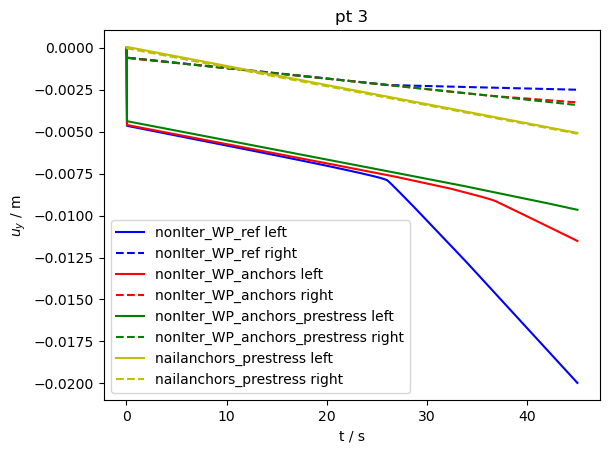

In [15]:
for i, entry in enumerate(data):
    plt.plot(f[entry].timesteps, data[entry]["ptl3"][:,1], f"{colors[i]}-", label=f"{entry} left")
    plt.plot(f[entry].timesteps, data[entry]["ptr3"][:,1], f"{colors[i]}--", label=f"{entry} right")
plt.ylabel("$u_y$ / m")
plt.xlabel("t / s")
plt.title("pt 3")
plt.legend()